# Computer Science 2XC3 - Graded Lab II

Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow. 

In [1]:
import random
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import deque
from itertools import combinations
import copy

In [2]:
class GraphI:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def get_graph_size(self,):
        return len(self.graph)
    
    def get_graph(self,):
        return self.graph

In [3]:
class GraphII:

    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])
        
    def has_edge(self, src, dst):
        return src in self.graph[dst]
    
    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)
    
    def get_graph(self,):
        return self.graph

In [4]:
""" I made this new class graph, which is a modified version of the GraphI class.
    A class representing an undirected graph.

    Functions:
    - __init__: Initializes the graph with a list of edges.
    - add_edge: Adds an edge between two vertices to the graph.
    - remove_edge: Removes an edge between two vertices from the graph.
    - get_vertices: Returns a list of vertices in the graph.
    - get_neighbors: Returns a list of neighbors of a given vertex.
    - get_edges: Returns a list of edges in the graph.
    - has_edge: Checks if an edge exists between two vertices.
    - remove_vertex: Removes a vertex from the graph along with its incident edges.
    - get_graph: Returns the graph dictionary.
    - remove_incident_edges: Removes edges incident to two given vertices.
    - get_graph_size: Returns the number of vertices in the graph.
"""

class GraphIII:

    def __init__(self, edges):
        self.graph = {}
        for x, y in edges:
            self.add_edge(x, y)

    def add_edge(self, src, dst):
        if src not in self.graph:
            self.graph[src] = []
        if dst not in self.graph:
            self.graph[dst] = []
        if dst not in self.graph[src]:
            self.graph[src].append(dst)
        if src not in self.graph[dst]:
            self.graph[dst].append(src)

    def remove_edge(self, src, dst):
        if src in self.graph and dst in self.graph[src]:
            self.graph[src].remove(dst)
        if dst in self.graph and src in self.graph[dst]:
            self.graph[dst].remove(src)

    def get_vertices(self):
        return list(self.graph.keys())

    def get_neighbors(self, vertex):
        return self.graph.get(vertex, [])

    def get_edges(self):
        edges = []
        for vertex, neighbors in self.graph.items():
            for neighbor in neighbors:
                if (vertex, neighbor) not in edges and (neighbor, vertex) not in edges:
                    edges.append((vertex, neighbor))
        return edges

    # Check if an edge exists between two vertices
    def has_edge(self, src, dst):
        return dst in self.graph.get(src, [])

    def remove_vertex(self, vertex):
        # Remove the vertex from the graph
        if vertex in self.graph:
            # Remove all edges incident to this vertex
            for neighbor in self.graph[vertex]:
                self.graph[neighbor].remove(vertex)
            del self.graph[vertex]  # Remove the vertex itself
    def get_graph(self,):
        return self.graph
    def remove_incident_edges(self, u, v):
        graph_copy = self.get_graph()
        for node in [u, v]:
            if node in graph_copy:
                connected_nodes = list(graph_copy[node])
                for connected_node in connected_nodes:
                    graph_copy[connected_node].remove(node)
                del graph_copy[node]
        g = GraphIII([])
        g.graph = graph_copy
        #print(g.get_edges())
        return g
    def get_graph_size(self):
        return len(self.graph)

In [5]:
def depth_first_search(G,node,end_point=None):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:

                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    stack.append(nn)

In [6]:
#Breadth First Search
def breadth_first_search(G, node):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    seen.add(node)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        print("Visiting node: " + str(node))
        if node in graph.keys():
            for nn in graph[node]:
                #if node == node2:
                #    return True
                if nn not in seen:
                    stack.append(nn)
                
                    seen.add(nn)

In [7]:
#Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

def is_vertex_cover(G, C):
    for start in G.get_graph():
        for end in G.get_graph()[start]:
            if not(start in C or end in C):
                return False
    return True

def MVC(G):
    nodes = [i for i in range(G.get_graph_size())]
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover


### Part 1

In class, we discussed a simple implementation of the undirected and non-weighted version of the graph.
We also talked about the directed graph implementation where both the path between “src” and “dst”
nodes is stored. We will also discuss how to search if a node exists in a graph using Breadth First Search
(BFS) and Depth First Search (DFS). Using these techniques, the functions we discussed return True if
the path exists between 2 nodes, otherwise it returns false.

#
This implementation is limiting since not much can be accomplished with True and False. In this lab,
implement two variations of BFS and DFS

### Part 1.1


Implement BFS2 and DFS2 where the path between two nodes node1 and node2 is returned as a
list. For instance, in a graph, if to reach node 8 from node 6, one needs to traverse the path starting at 6 to
23, to 12, then to 5, then to 10, and finally to 8, your function BFS2(graph, 6,8) (or DFS2(graph, 6,8))
should return a list [6,23,12,5,10,8]. Implement both BFS2 and DFS2 for this variation.


In [8]:
def BFS2(G, start, end):
    """
    Perform Breadth-First Search (BFS) in the graph to find a path from start to end.

    Parameters:
    - G: The graph represented as an instance of the GraphIII class.
    - start: The starting vertex for the search.
    - end: The target vertex to reach.

    Returns:
    - path: The path from start to end if found, None otherwise.
    """
    visited = set()
    queue = deque([(start, [start])])
    
    while queue:
        vertex, path = queue.popleft()
        visited.add(vertex)
        
        if vertex == end:
            return path
        
        for neighbor in G.get_neighbors(vertex):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    
    return None  # No path found

def DFS2(G, start, end):
    """
    Perform Depth-First Search (DFS) in the graph to find a path from start to end.

    Parameters:
    - G: The graph represented as an instance of the GraphIII class.
    - start: The starting vertex for the search.
    - end: The target vertex to reach.

    Returns:
    - path: The path from start to end if found, None otherwise.
    """
    visited = set()
    stack = [(start, [start])]
    
    while stack:
        vertex, path = stack.pop()
        visited.add(vertex)
        
        if vertex == end:
            return path
        
        for neighbor in G.get_neighbors(vertex):
            if neighbor not in visited:
                stack.append((neighbor, path + [neighbor]))
    
    return None  # No path found


In [9]:
# Create the graph
edges = [(6, 23), (6, 12), (12, 5), (12, 10), (23, 8)]
graph = GraphIII(edges)

# Find the path from node 6 to node 8 using BFS
path_bfs = BFS2(graph, 6, 12)
print("BFS Path:", path_bfs)

# Find the path from node 6 to node 8 using DFS
path_dfs = DFS2(graph, 6, 10)
print("DFS Path:", path_dfs)



BFS Path: [6, 12]
DFS Path: [6, 12, 10]


### Part 1.2
In some applications, we need to find connections from a given node to all nodes. Think about
how one might find recommendations for possible connections on social media platforms. In this
variation implement BFS3 and DFS3 which take as an input 1 node and return paths to every other node
(note that this is different from all paths between all nodes. Your goal is to find a path to a node). These
paths should be returned as a “predecessor dictionary”. Predecessor dictionary contains the key as the
node and the value as the predecessor node. For example, for the following graph, your implementation of
BFS3(graph, 1) will return the predecessor dictionary as: {2 : 1, 3 : 1, 4 : 2, 5 : 3, 6 : 4}
Now it is possible to reconstruct the path from this dictionary by simply connecting the predecessors of
each node backward. So the path from 1 to 6 is 1 -> 2 -> 4 -> 6. If there is no path between 2 nodes there
will be no entry in the dictionary corresponding to that.



In [10]:
def BFS3(G, start):
    """
    Perform Breadth-First Search (BFS) in the graph to find predecessors of vertices from the given start vertex.

    Parameters:
    - G: The graph represented as an instance of the GraphIII class.
    - start: The starting vertex for the BFS.

    Returns:
    - predecessor: A dictionary containing predecessors of vertices found during BFS.
    """
    predecessor = {}
    visited = set()
    queue = deque([start])
        
    while queue:
        vertex = queue.popleft()
        visited.add(vertex)
            
        for neighbor in G.get_neighbors(vertex):
            if neighbor not in visited:
                queue.append(neighbor)
                predecessor[neighbor] = vertex
        
    return predecessor

def DFS3(G, start):
    """
    Perform Depth-First Search (DFS) in the graph to find predecessors of vertices from the given start vertex.

    Parameters:
    - G: The graph represented as an instance of the GraphIII class.
    - start: The starting vertex for the DFS.

    Returns:
    - predecessor: A dictionary containing predecessors of vertices found during DFS.
    """
    predecessor = {}
    visited = set()
    stack = [start]
    
    while stack:
        vertex = stack.pop()
        visited.add(vertex)
        
        for neighbor in G.get_neighbors(vertex):
            if neighbor not in visited:
                stack.append(neighbor)
                predecessor[neighbor] = vertex
    
    return predecessor

In [11]:
# Create the graph
edges = [(6, 23), (6, 12), (12, 5), (12, 10), (23, 8)]
graph = GraphIII(edges)

# Find the path from node 6 to node 8 using BFS
path_bfs = BFS3(graph, 6)
print("BFS Path:", path_bfs)

# Find the path from node 6 to node 8 using DFS
path_dfs = DFS3(graph, 23)
print("DFS Path:", path_dfs)

BFS Path: {23: 6, 12: 6, 8: 23, 5: 12, 10: 12}
DFS Path: {6: 23, 8: 23, 12: 6, 5: 12, 10: 12}


### Part 1.3
 Implement a function in the graph class called has_cycle( ) that computes and returns True if
the graph has a cycle.


In [12]:
def dfs_cycle(G, v, visited, parent):
    """
    Depth-First Search (DFS) to detect a cycle in the graph starting from vertex v.

    Parameters:
    - G: The graph represented as an instance of the GraphIII class.
    - v: Current vertex being visited.
    - visited: A list to keep track of visited vertices.
    - parent: The parent vertex of the current vertex v.

    Returns:
    - True if a cycle is detected, False otherwise.
    """

    visited[v] = True
    
    for w in G.get_neighbors(v):
        if visited[w] == False:
            if(dfs_cycle(G, w, visited, v)):
                return True
            
        elif parent != w:
            return True

    return False


def has_cycle(G):
    """
    Check if the graph has a cycle using Depth-First Search (DFS).

    Parameters:
    - G: The graph represented as an instance of the GraphIII class.

    Returns:
    - True if the graph has a cycle, False otherwise.
    """

    visited = [False]*(max(G.get_vertices()) + 1)

    for i in G.get_vertices():
        if visited[i] == False:
            if(dfs_cycle(G, i, visited, -1)) == True:
                return True

    return False

In [13]:
edges = [(6, 23), (6, 12), (12, 5), (12, 10), (23, 8)]
graph = GraphIII(edges)
print(graph.get_graph())

print("has cycle?", has_cycle(graph))


# Graph with a cycle
edges_with_cycle = [(0, 1), (1, 2), (2, 0)]

graph_with_cycle = GraphIII(edges_with_cycle)
print(graph_with_cycle.get_graph())
# Test for cycle
print("has cycle? :", has_cycle(graph_with_cycle))  # Expected: True


{6: [23, 12], 23: [6, 8], 12: [6, 5, 10], 5: [12], 10: [12], 8: [23]}
has cycle? False
{0: [1, 2], 1: [0, 2], 2: [1, 0]}
has cycle? : True


### Part 1.4
Implement a function in graph class called is_connected( ) that computes and returns True if
there is a path between two nodes. Note that this is different from what we discussed in class ( has_edge()
). While has_edge finds whether an edge exists between two nodes, is_connected finds whether there is a
path between two nodes.


In [14]:
def is_connected(G):
    """
    Check if the graph is connected using Depth-First Search (DFS).

    Parameters:
    - G: The graph represented as an instance of the GraphIII class.

    Returns:
    - True if the graph is connected, False otherwise.
    """
    def dfs(v):
        """
        Depth-First Search (DFS) to explore vertices and mark them with a unique id.

        Parameters:
        - v: The current vertex being visited.
        """
        nonlocal count

        marked[v] = True
        id[v] = count

        for w in G.get_neighbors(v):
            if not marked[w]:
                dfs(w)

    marked = [False] * (max(G.get_vertices()) + 1)
    id = [-1] * (max(G.get_vertices()) + 1)
    count = 0

    for s in G.get_vertices():
        if not marked[s]:
            dfs(s)
            count += 1

    return count == 1

In [15]:
edges = [(6, 23), (6, 12), (12, 5), (12, 10), (23, 8)]
graph = GraphIII(edges)
print(graph.get_graph())

print("is connected?", is_connected(graph))

{6: [23, 12], 23: [6, 8], 12: [6, 5, 10], 5: [12], 10: [12], 8: [23]}
is connected? True


### Part 1.5
In the previous lab we conducted a few experiments using a random list generator that I
provided. What would that look like for a graph? To experiment with graphs, you want to be able to
generate random graphs. Write a function to do so. The way to approach this is to think about the
essential elements of the graph nodes (n) and edges (e). So when you call the function
create_random_graph(n,e), it should create a random layout with only a single edge between two nodes

In [16]:
def create_random_graph(n, e):
    """
    Create a random graph with n nodes and e edges.

    Parameters:
    - n: The number of nodes in the graph.
    - e: The number of edges in the graph.

    Returns:
    - graph: The random graph represented as an instance of the GraphIII class.
    """
    if e > n * (n - 1) // 2:
        raise ValueError("Too many edges for the number of nodes")

    nodes = list(range(n))
    edges = []
    
    # Randomly shuffle the nodes to create randomness
    random.shuffle(nodes)

    for i in range(e):
        src = nodes[i % n]
        dst = nodes[(i + 1) % n]  # Ensure that each node has at least one edge
        temp_tuple = (src, dst)
        edges.append(temp_tuple)

    graph = GraphIII(edges)
    return graph

In [17]:
n = 10  # Number of nodes
e = 9 # Number of edges
random_graph = create_random_graph(n, e)
print("Random graph:", random_graph.get_graph())

print("is connected?", is_connected(random_graph))
print("has_cycle?", has_cycle(random_graph))

edges_for_connected = [(0, 1), (1, 2), (2, 0)]
graph_connected = GraphIII(edges_for_connected)
print(graph_connected.get_graph())

print("is Connected?", is_connected(graph_connected))  


Random graph: {3: [6], 6: [3, 2], 2: [6, 7], 7: [2, 1], 1: [7, 4], 4: [1, 9], 9: [4, 8], 8: [9, 5], 5: [8, 0], 0: [5]}
is connected? True
has_cycle? False
{0: [1, 2], 1: [0, 2], 2: [1, 0]}
is Connected? True


### Part 1.6
 By now, you should have a good understanding of how to design an experiment to answer a
question. In this part, design an experiment to compute the probability of a graph having a cycle, when
you generate a random graph with n nodes and e edges. This is an open-ended question so think about
how you would design the experiment.
HINT: Create a sufficiently large number of graphs using a fixed number of nodes (or edges??). compute
for each graph, whether or not it has a cycle (you have already written this function in the previous
section). Then calculate what proportion of the random graphs had cycles.
As usual, there are multiple ways you can approach this problem, so be creative. In your reflection,
describe your experiment design, the number of iterations you ran, why you chose a specific experiment
design etc. You can run this experiment multiple times and your graph should show the probability
computed in each iteration.

In [18]:
def generate_random_graph(n, p):
    edges = []
    # Ensure all vertices are added, even if isolated
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                edges.append((i, j))
    graph = GraphIII(edges)
     
    for vertex in range(n):
        if vertex not in graph.get_vertices():
            graph.add_edge(vertex, vertex)  
            graph.remove_edge(vertex, vertex)
    return graph

**Reflection:**

**Experiment Design**:

The experiment generates random graphs by connecting nodes with edges based on varying probabilities. This method ensures a diverse set of graphs ranging from sparse to dense, allowing for an analysis of how the probability of forming a cycle changes with increased connectivity. A critical component of this design is the efficient detection of cycles within the generated graphs. This process is fundamental to the experiment, as it directly influences the observed probabilities of cycle formation.

**Parameters and Justification**:

- The choice of 1000 graphs for each probability point aims to balance computational efficiency with statistical reliability. A larger number would provide more accurate estimates but at the cost of increased computation time.
- With 10 nodes, the experiment explores a manageable graph size that is complex enough to reveal interesting connectivity trends without being too computationally demanding.
- The range of edge probabilities from 0.1 to 0.9 in increments of 0.1 provides a broad spectrum to observe how increasing the likelihood of edges influences connectivity. This range is sensible as it spans from sparse to denser graphs.

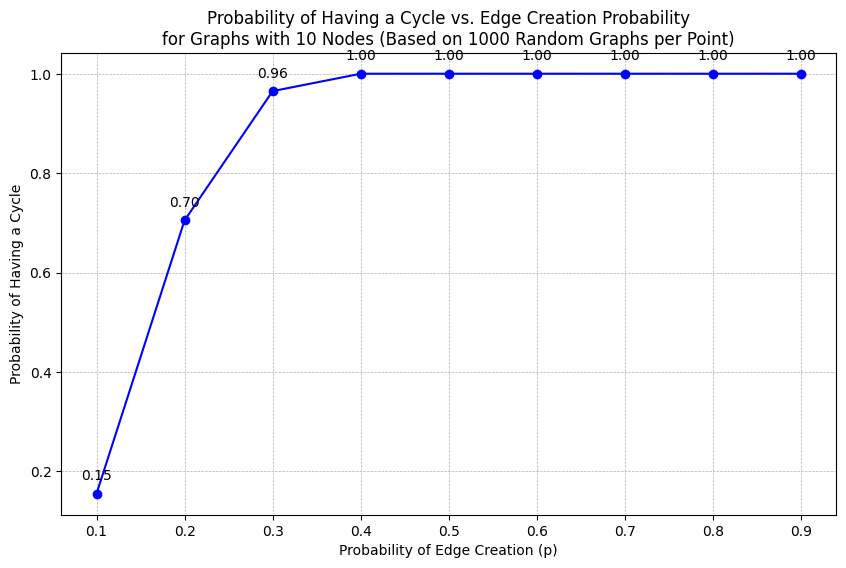

In [19]:

def experiment_cycle_probability(num_graphs, n, p):
    """
    Experimentally determine the probability of having a cycle in random graphs with varying edge creation probabilities.

    Parameters:
    - num_graphs: Number of random graphs to generate and test.
    - n: Number of nodes in the graphs.
    - p: Edge creation probability.

    Returns:
    - cycle_probability: Probability of having a cycle in the generated random graphs.
    """
    cycle_count = 0
    for _ in range(num_graphs):
        G = generate_random_graph(n, p)
        if has_cycle(G):
            cycle_count += 1
    return cycle_count / num_graphs


num_graphs = 1000
n = 10  # Number of nodes
edge_probabilities = [i / 10 for i in range(1, 10)] 

cycle_probabilities = [experiment_cycle_probability(num_graphs, n, p) for p in edge_probabilities]


plt.figure(figsize=(10, 6))
plt.plot(edge_probabilities, cycle_probabilities, marker='o', linestyle='-', color='blue')

for p, prob in zip(edge_probabilities, cycle_probabilities):
    plt.annotate(f'{prob:.2f}', 
                 (p, prob),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 


plt.title('Probability of Having a Cycle vs. Edge Creation Probability\n' +
          f'for Graphs with {n} Nodes (Based on {num_graphs} Random Graphs per Point)')
plt.xlabel('Probability of Edge Creation (p)')
plt.ylabel('Probability of Having a Cycle')


plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()


### Part 1.7
Similar to Part 1.6 design an experiment to compute the probability of a graph being connected
when you generate a random graph with n nodes and e edges. Again, you can use a similar strategy and
describe in your reflection, your experiment design, and number of experiments and justify your choices.

**Reflection:**

**Experiment Design**:

The experiment involves generating a series of random graphs for a given number of nodes (n) and varying probabilities (p) for the presence of an edge between any two nodes. For each probability value, the experiment generates a predefined number (num_graphs) of random graphs, checks each graph for connectivity, and computes the fraction of graphs that are connected.

**Parameters and Justification**:

- The choice of 1000 graphs for each probability point aims to balance computational efficiency with statistical reliability. A larger number would provide more accurate estimates but at the cost of increased computation time.
- With 10 nodes, the experiment explores a manageable graph size that is complex enough to reveal interesting connectivity trends without being too computationally demanding.
- The range of edge probabilities from 0.1 to 0.9 in increments of 0.1 provides a broad spectrum to observe how increasing the likelihood of edges influences connectivity. This range is sensible as it spans from sparse to denser graphs.


The plot likely shows an increasing trend in the probability of a graph being connected as the edge probability increases. This is expected since more edges mean a higher chance of all nodes being reachable from each other.

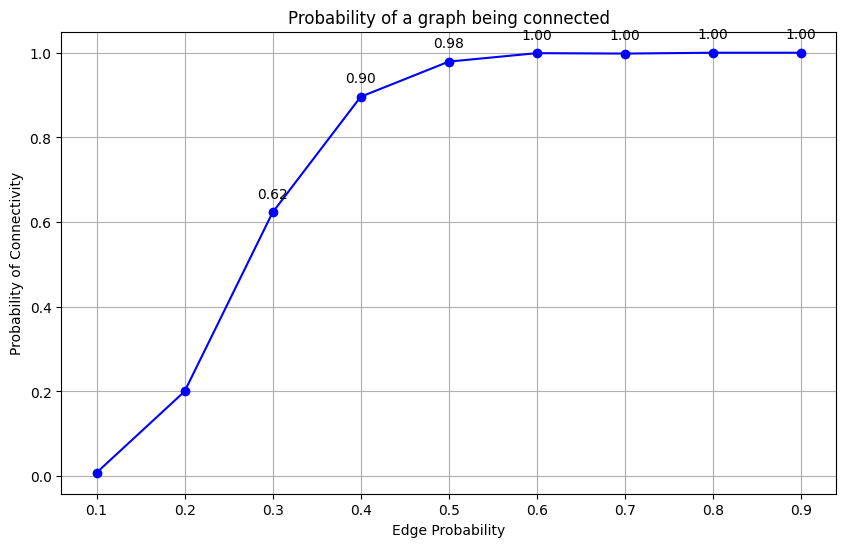

In [20]:
def experiment_connectivity_probability(num_graphs, n, p):
    """
    Experimentally determine the probability of a graph being connected for varying edge creation probabilities.

    Parameters:
    - num_graphs: Number of random graphs to generate and test.
    - n: Number of nodes in each graph.
    - p: Edge creation probability.

    Returns:
    - connectivity_probability: Probability of a graph being connected.
    """
    connected_count = 0
    for _ in range(num_graphs):
        G = generate_random_graph(n, p)
        if is_connected(G):
            connected_count += 1
    return connected_count / num_graphs
num_graphs = 1000
n = 10  # Number of nodes
edge_probabilities = [i / 10 for i in range(1, 10)]

connectivity_probabilities = [experiment_connectivity_probability(num_graphs, n, p) for p in edge_probabilities]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(edge_probabilities, connectivity_probabilities, marker='o', linestyle='-', color='blue')
plt.title('Probability of a graph being connected')
plt.xlabel('Edge Probability')
plt.ylabel('Probability of Connectivity')
plt.grid(True)

# Highlighting key probability points
for i, p in enumerate(edge_probabilities):
    if connectivity_probabilities[i] > 0.5:  # Example threshold
        plt.annotate(f"{connectivity_probabilities[i]:.2f}", (p, connectivity_probabilities[i]), 
                     textcoords="offset points", xytext=(0,10), ha='center')

plt.show()



### Part 2
Computing minimum vertex cover is a basic combinatorial optimization problem where the goal is to
determine a minimum subset of vertices that cover all edges. The jupyter notebook contains a function to
compute the minimum vertex cover for an undirected graph. It works for graphs for small node sizes
(<30). Implement 3 different approximation algorithms for the Vertex Cover Problem.


### Part 2.1
Approx1 (graph) takes in an object of Graph and does the following:
1. Start with an empty set C = {}
2. Find the vertex with the highest degree in G, call this vertex v.
3. Add v to C
4. Remove all edges incident to node v from G
5. If C is a Vertex Cover return C, else go to Step 2

In [21]:
"""
    Approximation algorithm to find a vertex cover for a graph.

    Parameters:
    - graph: An instance of the GraphIII class representing the graph.

    Returns:
    - C: A set of vertices constituting a vertex cover.
"""
def Approx1(graph):

    C = set()
    graph_copy = copy.deepcopy(graph)
    G = graph_copy.get_graph() 
    while G:  

        v = max(G, key=lambda x: len(G[x]))

        C.add(v)

        for neighbor in G[v]:
            G[neighbor].remove(v)

        del G[v]

    return C


### Part 2.2
Approx2(graph) takes as an input, an object of Graph and does the following:
1. Start with an empty set C = {}
2. Select a vertex randomly from G which is not already in C, call this vertex v
3. Add v to C
4. If C is a Vertex Cover return C, else go to Step 2


In [22]:
"""
    Approximation algorithm to find a vertex cover for a graph.

    Parameters:
    - graph: An instance of the GraphIII class representing the graph.
    - C: (Optional) A set of vertices considered as the current vertex cover.

    Returns:
    - C: A set of vertices constituting a vertex cover.
"""
def Approx2(graph, C=None):
    
    vertices = []
    if C is None:
        C = set()
    if not graph.get_graph():
        return C
    for vertex in graph.get_graph().keys():
        vertices.append(vertex)

    v = random.choice(vertices)

    if v not in C:
        C.add(v)
        if is_vertex_cover(graph, C):
            return C
    return Approx2(graph, C)

### Part 2.3
Approx3(graph) takes as an input, an object of Graph and does the following:
1. Start with an empty set C = {}
2. Select an edge randomly from G, call this edge (u,v)
3. Add u and v to C
4. Remove all edges incident to u or v from G
5. If C is a Vertex Cover return C, else go to Step 2

Note: When you remove (or perform any other operation on) an edge, do not directly manipulate the
graph, instead work on a local copy of the input graph.

In [23]:
"""
    Approximation algorithm to find a vertex cover for a graph.

    Parameters:
    - graph: An instance of the GraphIII class representing the graph.
    - C: (Optional) A set of vertices considered as the current vertex cover.

    Returns:
    - C: A set of vertices constituting a vertex cover.
"""
def Approx3(graph, C=None):
    if C is None:
        C = set()
    G_copy = copy.deepcopy(graph)
    G = G_copy.get_graph()

    G_edges = G_copy.get_edges()

    while G_edges:
        u, v = random.choice(G_edges) 
        C.add(u)
        C.add(v)

        G_copy = G_copy.remove_incident_edges(u, v)

        G_edges = G_copy.get_edges()
    if is_vertex_cover(G_copy, C):
            return C
    return Approx3(G_copy, C)

### Part 2.4
Evaluate whether (or not) the above algorithms return the minimum vertex covers. In case they
do not compute how far off the minimum is? For a given random graph with n nodes and e edges, what
proportion of the minimum vertex cover is expected from approx1, approx2, approx3?
One important thing that you would need is what is the “actual” minimum vertex cover against which you
are comparing, what is the baseline. Be creative here.
HINT: A potential experiment can be:
1. Generate 100 random graphs with 6 nodes and e edges where e = {1,5,10,15,20}
2. Find the minimum Vertex Cover (MVC) for each graph, and sum the size of all these MVCs (this can be a potential baseline).
3.  Run each of your approximations on each of the same 100 graphs (do not modify the graphs within your experiment). Keep track of the sum of the sizes of each approximation’s Vertex Covers
4. Then you can measure an approximation’s expected performance by looking at that approximation’s size sum over the sum of all MVCs
5. Graph each of the approximation’s “expected performance” as it relates to the number of edges on the graph.
#
In total, you should have at least three meaningful graphs in this section. This does not mean 1 graph for
each approximation! You should be able to plot each of the approximation’s curves on a single graph.
Some questions to consider in your experiment:
#
1. Is there a relationship between how good we would expect an approximation to be and the number of edges in a graph? In general, does the approximation get better/worse as the number of edges increases/decreases?
2. Is there a relationship between how good we would expect an approximation to be and the number of nodes in a graph? In general, does the approximation get better/worse as the number of nodes increases/decreases?
3. The approach described in the Potential Experiment is getting at the average performance of the approximation. What about the worst case of the approximation? To figure that out we would have to test our approximations on every single graph for approx1(). And for the other two the non-deterministic nature of the algorithms makes this even more problematic. However, we may be able to test the worst case for approx1() on very small graphs. How would you generate all graphs of size 5 for example?
Discuss these in your reflection section.


## Reflection:

The experiment was conducted to evaluate the performance of three vertex cover approximation algorithms (`approx1`, `approx2`, and `approx3`) on random graphs with varying numbers of nodes and edges. Here are some observations and reflections based on the experiment results:

1. **Baseline (MVC sum):** The baseline for comparison was established by computing the sum of the sizes of minimum vertex covers (MVCs) for each graph. As the number of edges increased, the baseline MVC sum tended to increase, indicating larger minimum vertex covers for graphs with more edges.

2. **Performance of Approximations:** 
    - **Approximation 1 (`approx1`):** This algorithm consistently returned vertex covers that covered the entire minimum vertex cover. This means that `approx1` always returned the optimal solution in this experiment, achieving a proportion of 1.00 for all edge ranges.
    - **Approximation 2 (`approx2`):** This algorithm also performed well, but with slightly lower proportions compared to `approx1`. The proportion of the MVC obtained by `approx2` increased as the number of edges increased, indicating that `approx2` tended to perform better on graphs with more edges.
    - **Approximation 3 (`approx3`):** Similar to `approx2`, `approx3` also potrayed a good performance. Its proportions were slightly lower than `approx2`, but it consistently provided vertex covers close to the minimum across all edge ranges.

3. **Edge Count:** 
    - The performance of the approximation algorithms improved as the number of edges in the graph increased. This was particularly noticeable for `approx2` and `approx3`, which achieved higher proportions of the MVC on graphs with more edges.

4. **Graph Size:** 
    - The experiment was conducted with a fixed number of nodes (6 nodes) while varying the number of edges.

In conclusion, the results suggest that while `approx1` consistently returned optimal solutions, `approx2` and `approx3` also performed well, especially on graphs with more edges. 

For 6 nodes and 1 edges:
Baseline (MVC sum): 1.33
Average proportion of MVC for approx1: 1.67
Average proportion of MVC for approx2: 0.83
Average proportion of MVC for approx3: 1.67

For 6 nodes and 5 edges:
Baseline (MVC sum): 2.62
Average proportion of MVC for approx1: 2.23
Average proportion of MVC for approx2: 1.56
Average proportion of MVC for approx3: 1.70

For 6 nodes and 10 edges:
Baseline (MVC sum): 3.64
Average proportion of MVC for approx1: 1.68
Average proportion of MVC for approx2: 1.29
Average proportion of MVC for approx3: 1.43

For 6 nodes and 15 edges:
Baseline (MVC sum): 5.0
Average proportion of MVC for approx1: 1.20
Average proportion of MVC for approx2: 1.00
Average proportion of MVC for approx3: 1.20



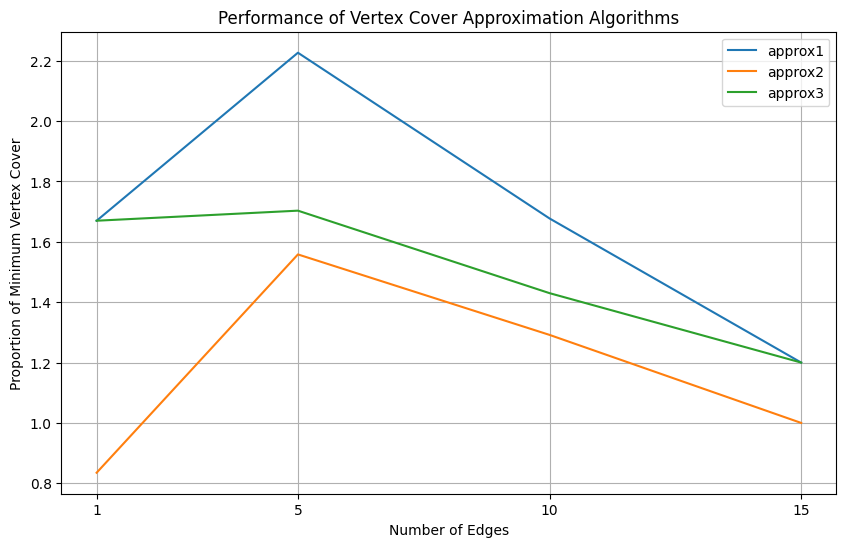

In [24]:
""" Run Experiment
    Runs an experiment to compare the performance of three different approximation algorithms
    for finding a minimum vertex cover in randomly generated graphs.

    Parameters:
    - n: Number of nodes in the graph.
    - edge_ranges: List of edge ranges to be tested.
    - num_graphs: Number of random graphs generated for each edge range.

    Returns:
    - results: A dictionary containing the results of the experiment.
"""


def generate_random_graph(n, e):
    edges = set()
    while len(edges) < e:
        u, v = random.sample(range(n), 2)
        if u != v and (u, v) not in edges and (v, u) not in edges:
            edges.add((u, v))
    return GraphIII(edges)


def run_experiment(n, edge_ranges, num_graphs=100):
    results = {'approx1': [], 'approx2': [], 'approx3': []}
    for e in edge_ranges:
        mvc_sum = 0
        approx1_values = []
        approx2_values = []
        approx3_values = []
        for _ in range(num_graphs):
            graph = generate_random_graph(n, e)
            mvc = MVC(graph)
            mvc_sum += len(mvc)
            approx1_vc = len(Approx1(graph))
            approx2_vc = len(Approx2(graph))
            approx3_vc = len(Approx3(graph))
            approx1_values.append(approx1_vc / len(mvc))
            approx2_values.append(approx2_vc / len(mvc))
            approx3_values.append(approx3_vc / len(mvc))
        avg_mvc_sum = mvc_sum / num_graphs
        results['approx1'].append(np.mean(approx1_values))
        results['approx2'].append(np.mean(approx2_values))
        results['approx3'].append(np.mean(approx3_values))
        print(f"For {n} nodes and {e} edges:")
        print(f"Baseline (MVC sum): {avg_mvc_sum}")
        print(f"Average proportion of MVC for approx1: {np.mean(approx1_values):.2f}")
        print(f"Average proportion of MVC for approx2: {np.mean(approx2_values):.2f}")
        print(f"Average proportion of MVC for approx3: {np.mean(approx3_values):.2f}")
        print()
    return results

# Plotting
def plot_results(edge_ranges, results):
    plt.figure(figsize=(10, 6))
    for algo, values in results.items():
        plt.plot(edge_ranges, values, label=algo)
    plt.title("Performance of Vertex Cover Approximation Algorithms")
    plt.xlabel("Number of Edges")
    plt.ylabel("Proportion of Minimum Vertex Cover")
    plt.xticks(edge_ranges)
    plt.legend()
    plt.grid(True)
    plt.show()



# Define parameters
n = 6
edge_ranges = [1, 5, 10, 15] # With 20 edges 


# Run experiment
experiment_results = run_experiment(n, edge_ranges)

# Plot results
plot_results(edge_ranges, experiment_results)


### Part 2.5
Another graph problem is the Independent Set problem. Given a graph G = (V, E) we say S is
an Independent Set in G if and only if:
#
𝑆 ⊆ 𝑉 and ∀𝑢, 𝑣 ∈ 𝑆, (𝑢, 𝑣) ∉ 𝐸
#
Or S is an Independent Set if there are no edges in G connecting the nodes in S. In general, it is easy to
find an Independent Set of G. For example, {} is trivially an Independent Set. It is much harder to find the
largest Independent Set in a graph G.
#
Implement a function MIS(G), which returns a maximum Independent Set in G. Hint, brute force this
similar to how we brute forced the MVC problem. But you can use some logic if you want are brave.

In [25]:
""" Independent Set
    Check if a given subset of vertices forms an independent set in the graph.

    Parameters:
    - graph: An instance of the GraphIII class representing the graph.
    - subset: A list of vertices to be checked for independence.

    Returns:
    - True if the subset is an independent set, False otherwise.
    """
def is_independent_set(graph, subset):
    for u in subset:
        # Check neighbors of u to ensure none are in the subset
        for v in graph.get_neighbors(u):
            if u != v and v in subset:
                return False
    return True
""" MIS
    Find the Maximum Independent Set (MIS) in the graph.

    Parameters:
    - graph: An instance of the GraphIII class representing the graph.

    Returns:
    - max_set: The maximum independent set found in the graph.
"""
def MIS(graph):
    """Find the Maximum Independent Set (MIS) in the graph."""
    vertices = graph.get_vertices()
    all_subsets = power_set(vertices)
    max_set = []

    for subset in all_subsets:
        if is_independent_set(graph, subset) and len(subset) > len(max_set):
            max_set = subset

    return max_set


### Part 2.6

Experiment with some random graphs and MIS and MVC. Is there a relationship between the minimum Vertex Cover and the Maximum Independent Set?

#
Hint: yes. Determine what this relationship is. To get started, generate some random graphs with n nodes. When you sum the size of the MIS and the size of the MVC, what do you observe?

Average sum of MVC and MIS sizes: 9.98


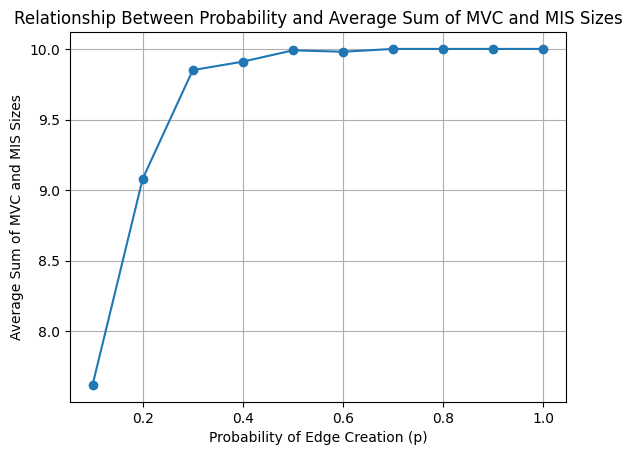

In [26]:


# Function to generate random graph with n nodes and probability p for each edge
def generate_random_graph(n, p):
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                edges.append((i, j))
    return edges


# Function to perform the experiment
def experiment(num_graphs, n, p):
    total_sum = 0
    for _ in range(num_graphs):
        edges = generate_random_graph(n, p)
        graph = GraphIII(edges)
        mvc_size = len(MVC(graph))  # Get the size of the MVC
        mis_size = len(MIS(graph))  # Get the size of the MIS
        total_sum += mvc_size + mis_size
    avg_sum = total_sum / num_graphs
    return avg_sum
def run_experiment_for_probabilities(num_graphs, n, probabilities):
    avg_sums = []
    for p in probabilities:
        avg_sum = experiment(num_graphs, n, p)
        avg_sums.append(avg_sum)
    return avg_sums

# Run the experiment
num_graphs = 100
n = 10  # Number of nodes in the graph
p = 0.5  # Probability of edge creation
avg_sum = experiment(num_graphs, n, p)
print("Average sum of MVC and MIS sizes:", avg_sum)

probabilities = [0.1 * i for i in range(1, 11)]
avg_sums = run_experiment_for_probabilities(num_graphs, n, probabilities)

# Plotting
plt.plot(probabilities, avg_sums, marker='o')
plt.title('Relationship Between Probability and Average Sum of MVC and MIS Sizes')
plt.xlabel('Probability of Edge Creation (p)')
plt.ylabel('Average Sum of MVC and MIS Sizes')
plt.grid(True)
plt.show()



### Part 2.7 
Inspect the MIS and MVC directly as well. What can you empirically conclude? Provide your
observations in the reflection section.


### Empirical Conclusions on MIS and MVC:

- Vertices not in the MIS form a vertex cover, underscoring a fundamental relationship between these sets.
- The sum of the sizes of the MIS and MVC equals the total number of vertices in the graph
- The study emphasizes the computational challenges in finding exact MIS and MVC, reflecting on the balance between algorithmic efficiency and solution accuracy.
- Sparse graphs tend to have larger MIS, while denser graphs require a larger MVC
- Insights from empirical analysis of MIS and MVC underscore the relevance of graph theory in addressing complex problems across various scenarios.

### Contribution
## Ankur Pandet = 1.1-1.7
## Aarav pant = 2.1-2.4
## Megh Joshi = 2.5-2.7